### Strategy

-   Split unseen data
-   Easy Prediction Avg per neigborgood
-   Train all models
-   Select the best 3 models
-   Feature / Selection
-   Fine tune them & evaluate
-   Stack / Blend them
-   Save model
-   Predict unseen data

In [30]:
from pycaret.regression import *
import pandas as pd

In [40]:
dataset = pd.read_csv('data/clean_data_3.csv')
dataset['price_sq_m'] = dataset['price_act'] / dataset['sq_m'] # Creating price/m^2
dataset.drop(['street', 'st_number', 'price_first'], axis=1, inplace=True)

data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

unseen_ids = data_unseen.house_id
unseen_act_price = data_unseen.price_act
data_unseen.drop(['house_id', 'price_act'], inplace=True, axis=1)
data.drop(['house_id', 'price_act'], inplace=True, axis=1)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (1094, 16)
Unseen Data For Predictions (121, 16)


In [41]:
mean_estimator_df = data[['nbhood', 'price_sq_m']].groupby('nbhood', as_index=False).mean().sort_values(by = 'price_sq_m', ascending=False)
mean_estimator_df.head()

,nbhood,price_sq_m
2,cortadura - zona franca,3895.683543
7,playa victoria,3495.397337
6,playa stª mª del mar,3258.076990
9,zona laguna,2822.008175
8,zona bahia blanca,2712.645900


In [42]:
data.columns

Index(['advertiser', 'type', 'nbhood', 'sq_m', 'bedrooms', 'bathrooms',
       'const_year', 'floor', 'lift', 'balcony', 'air_con', 'ft_wardrobes',
       'terrace', 'exterior', 'heating', 'price_sq_m'],
      dtype='object')

In [49]:
experiment_1 = setup(data = data, 
                    target = 'price_sq_m', 
                    session_id=111,
                    normalize = True,
                    transformation = True,
                    transform_target = True, 
                    combine_rare_levels = True,
                    rare_level_threshold = 0.05,
                    remove_multicollinearity = True,
                    multicollinearity_threshold = 0.95, 
                    #bin_numeric_features = ['sq_m', 'const_year'], # not worth it
                    log_experiment = True, 
                    experiment_name = 'test_1') 

,Description,Value
0,session_id,111
1,Target,price_sq_m
2,Original Data,"(1094, 16)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,11
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(765, 48)"


In [50]:
best = compare_models(sort = 'MAE') # MAE seems to be more robust to outliers

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,380.4662,323212.5602,561.7304,0.5335,0.2010,0.1468,0.1420
lightgbm,Light Gradient Boosting Machine,397.4339,327787.4928,565.8872,0.5220,0.2035,0.1549,0.0410
gbr,Gradient Boosting Regressor,398.7023,332748.6651,568.7806,0.5228,0.2015,0.1545,0.0470
br,Bayesian Ridge,419.0868,358954.1288,591.9898,0.4733,0.2079,0.1608,0.0200
huber,Huber Regressor,421.1610,367387.7349,599.3847,0.4590,0.2108,0.1619,0.0380
et,Extra Trees Regressor,422.3213,416655.2114,635.5443,0.4046,0.2248,0.1638,0.1590
ridge,Ridge Regression,423.1825,365474.7984,597.0072,0.4634,0.2095,0.1622,0.0370
lr,Linear Regression,427.8707,375662.3016,605.3269,0.4461,0.2701,0.1644,0.0680
knn,K Neighbors Regressor,457.1884,434273.9062,654.5860,0.3643,0.2337,0.1734,0.0280
ada,AdaBoost Regressor,476.4999,428996.2032,650.8776,0.3709,0.2313,0.1845,0.0580


# Random Forest estimator

In [82]:
rf = create_model('rf', fold=10, verbose=True) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,317.6286,226873.7266,476.3126,0.6667,0.1790,0.1293
1,411.1782,460892.9439,678.8910,0.5524,0.2299,0.1654
2,411.2091,304124.1060,551.4745,0.4000,0.2156,0.1554
3,334.5175,197658.4903,444.5880,0.5697,0.1786,0.1305
4,354.5978,231155.6664,480.7865,0.6587,0.1843,0.1448
5,381.6427,278262.7219,527.5061,0.4601,0.1974,0.1527
6,414.7825,423776.5957,650.9813,0.5109,0.2068,0.1520
7,410.2437,490498.5510,700.3560,0.4465,0.2014,0.1410
8,402.7422,374020.4787,611.5721,0.5069,0.2327,0.1588


In [87]:
rf_tuned = tune_model(rf, n_iter=70, optimize='MAE', verbose=True)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,346.3727,255392.7555,505.3640,0.6248,0.1862,0.1390
1,437.8873,494684.0665,703.3378,0.5196,0.2449,0.1804
2,443.4374,352986.2572,594.1265,0.3036,0.2209,0.1643
3,381.0052,255586.5300,505.5557,0.4435,0.1889,0.1459
4,385.4003,264645.2273,514.4368,0.6093,0.1947,0.1592
5,390.3825,260483.0149,510.3754,0.4946,0.1966,0.1578
6,413.4142,479422.8732,692.4037,0.4467,0.2172,0.1486
7,425.4164,487224.0822,698.0144,0.4502,0.2049,0.1467
8,427.4131,384941.9786,620.4369,0.4925,0.2305,0.1652


In [84]:
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,363.8113,357100.1065,597.5785,0.5611,0.1930,0.1405


,sq_m,bedrooms,bathrooms,const_year,advertiser_Developer,advertiser_Private owner,advertiser_Professional advertiser,advertiser_not_available,type_ detached house,type_ house,...,balcony_0,air_con_0,ft_wardrobes_0,terrace_0,exterior_0,heating_central,heating_individual,heating_no,price_sq_m,Label
0,0.671908,-0.650478,0.901878,-1.852182,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2903.225830,2568.280855
1,-0.221798,0.184396,0.901878,-0.165760,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4352.941406,3723.970071
2,0.883922,0.852100,0.901878,0.502931,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2644.927490,2715.114521
3,0.512538,0.184396,-0.813005,-0.425466,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1711.304321,1737.649647
4,-1.706566,-2.746824,-0.813005,-0.165760,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3260.869629,2868.285562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.008355,0.184396,-0.813005,0.326089,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2419.354736,2512.687305
325,2.141234,1.421752,1.566443,-0.165760,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2583.333252,2501.629634
326,1.039681,0.852100,0.901878,-2.083258,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2000.000000,1747.152190
327,-0.283282,0.184396,-0.813005,-0.165760,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2048.192871,1904.143729


In [85]:
predict_model(rf_tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,397.1027,428526.1383,654.6191,0.4733,0.2077,0.1527


,sq_m,bedrooms,bathrooms,const_year,advertiser_Developer,advertiser_Private owner,advertiser_Professional advertiser,advertiser_not_available,type_ detached house,type_ house,...,balcony_0,air_con_0,ft_wardrobes_0,terrace_0,exterior_0,heating_central,heating_individual,heating_no,price_sq_m,Label
0,0.671908,-0.650478,0.901878,-1.852182,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2903.225830,2331.366350
1,-0.221798,0.184396,0.901878,-0.165760,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4352.941406,3145.063771
2,0.883922,0.852100,0.901878,0.502931,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2644.927490,2911.010735
3,0.512538,0.184396,-0.813005,-0.425466,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1711.304321,1827.574831
4,-1.706566,-2.746824,-0.813005,-0.165760,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3260.869629,2976.639956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.008355,0.184396,-0.813005,0.326089,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2419.354736,2541.293873
325,2.141234,1.421752,1.566443,-0.165760,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2583.333252,2996.947328
326,1.039681,0.852100,0.901878,-2.083258,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2000.000000,1793.839260
327,-0.283282,0.184396,-0.813005,-0.165760,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2048.192871,1935.275711


In [5]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,349.1253,212640.9452,461.1301,0.6876,0.1810,0.1413
1,402.2918,420765.4265,648.6643,0.5914,0.2215,0.1621
2,428.7820,295372.2084,543.4816,0.4173,0.2059,0.1623
3,367.7946,244456.3368,494.4253,0.4678,0.1885,0.1433
4,355.8183,212974.1012,461.4912,0.6856,0.1852,0.1508
5,395.2806,281801.9170,530.8502,0.4532,0.2090,0.1645
6,412.6513,390461.1691,624.8689,0.5493,0.2063,0.1576
7,447.9181,555151.8762,745.0851,0.3735,0.2097,0.1543
8,418.0622,385358.5178,620.7725,0.4920,0.2298,0.1604


In [8]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,353.8117,236677.6805,486.4953,0.6523,0.1813,0.1434
1,432.4953,486579.2182,697.5523,0.5275,0.2415,0.1781
2,420.6097,291816.1196,540.2001,0.4243,0.2052,0.1593
3,362.2573,211636.8916,460.0401,0.5392,0.1792,0.1417
4,371.6005,230089.7771,479.6767,0.6603,0.1808,0.1518
5,366.0179,218169.0935,467.0857,0.5767,0.1870,0.1513
6,446.2206,456058.5061,675.3210,0.4736,0.2200,0.1668
7,455.2383,553030.3630,743.6601,0.3759,0.2135,0.1569
8,422.9078,377858.8887,614.7023,0.5019,0.2256,0.1628


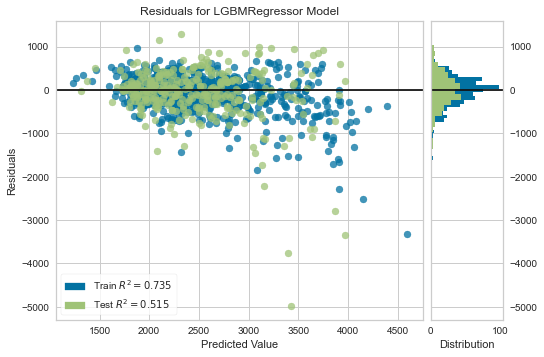

In [9]:
plot_model(tuned_lightgbm)

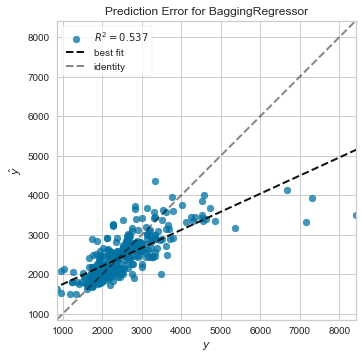

In [10]:
plot_model(bagged_rf, plot = 'error')

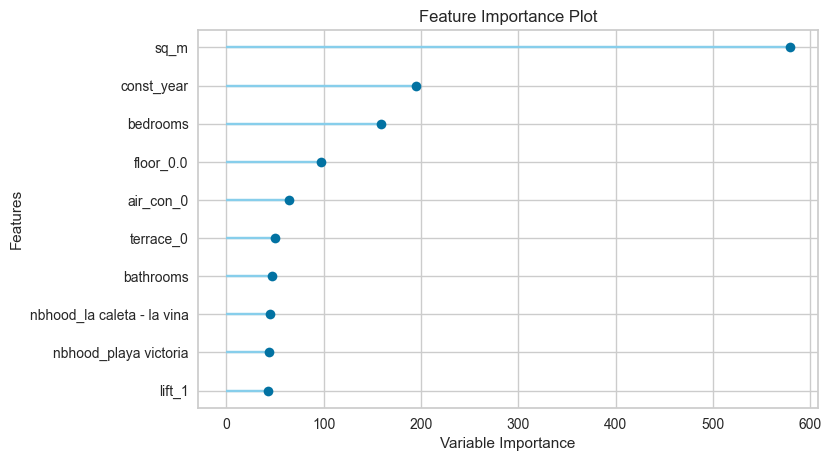

In [10]:
plot_model(tuned_lightgbm, plot='feature')

In [12]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [13]:
final_lightgbm = finalize_model(tuned_lightgbm)

[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will b

In [14]:
predict_model(final_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,295.9900,227267.0914,476.7254,0.7207,0.1479,0.1115


,sq_m,bedrooms,bathrooms,const_year,advertiser_Developer,advertiser_Private owner,advertiser_Professional advertiser,advertiser_not_available,type_ detached house,type_ house,...,balcony_0,air_con_0,ft_wardrobes_0,terrace_0,exterior_0,heating_central,heating_individual,heating_no,price_sq_m,Label
0,0.671908,-0.650478,0.901878,-1.852182,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2903.225830,2483.024893
1,-0.221798,0.184396,0.901878,-0.165760,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4352.941406,3574.090422
2,0.883922,0.852100,0.901878,0.502931,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2644.927490,2689.148388
3,0.512538,0.184396,-0.813005,-0.425466,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1711.304321,1738.964723
4,-1.706566,-2.746824,-0.813005,-0.165760,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3260.869629,3049.382914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.008355,0.184396,-0.813005,0.326089,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2419.354736,2535.111641
325,2.141234,1.421752,1.566443,-0.165760,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2583.333252,2729.120134
326,1.039681,0.852100,0.901878,-2.083258,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2000.000000,1866.133319
327,-0.283282,0.184396,-0.813005,-0.165760,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2048.192871,2034.176370


In [28]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions['estimated_price'] = unseen_predictions.Label * unseen_predictions.sq_m
unseen_predictions['act_price'] = unseen_act_price
unseen_predictions['house_id'] = unseen_ids
unseen_predictions['diff'] = unseen_predictions['act_price'] - unseen_predictions['estimated_price']
unseen_predictions['link'] = [f'https://www.idealista.com/en/inmueble/{id}/' for id in unseen_predictions.house_id]

unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,347.2390,232700.3481,482.3902,0.5063,0.1794,0.1343


,advertiser,type,nbhood,sq_m,bedrooms,bathrooms,const_year,floor,lift,balcony,...,terrace,exterior,heating,price_sq_m,Label,estimated_price,act_price,house_id,diff,link
0,Professional advertiser,flat / apartment,centro historico - plaza espana,198.0,4.0,2.0,2003.0,1.0,1,1,...,0,1,individual,1654.040404,2175.152214,430680.138402,327500.0,94971680,-103180.138402,https://www.idealista.com/en/inmueble/94971680/
1,Professional advertiser,flat / apartment,centro historico - plaza espana,296.0,7.0,3.0,1888.0,2.0,0,0,...,0,1,no,2077.702703,1872.571284,554281.099938,615000.0,84635808,60718.900062,https://www.idealista.com/en/inmueble/84635808/
2,Professional advertiser,flat / apartment,centro historico - plaza espana,75.0,3.0,1.0,NaN,2.0,0,1,...,0,1,no,1800.000000,2091.182109,156838.658173,135000.0,96937735,-21838.658173,https://www.idealista.com/en/inmueble/96937735/
3,Professional advertiser,duplex,centro historico - plaza espana,110.0,2.0,2.0,NaN,4.0,0,1,...,1,1,no,2818.181818,2457.495719,270324.529134,310000.0,87441736,39675.470866,https://www.idealista.com/en/inmueble/87441736/
4,Professional advertiser,flat / apartment,ayuntamiento - catedral,80.0,3.0,1.0,1959.0,1.0,0,0,...,0,0,no,2237.500000,1926.570749,154125.659924,179000.0,93295412,24874.340076,https://www.idealista.com/en/inmueble/93295412/
